## Real Estate Price Predictor

In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [165]:
housing = pd.read_csv("data.csv")
housing.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [166]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [167]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Plotting Histogram

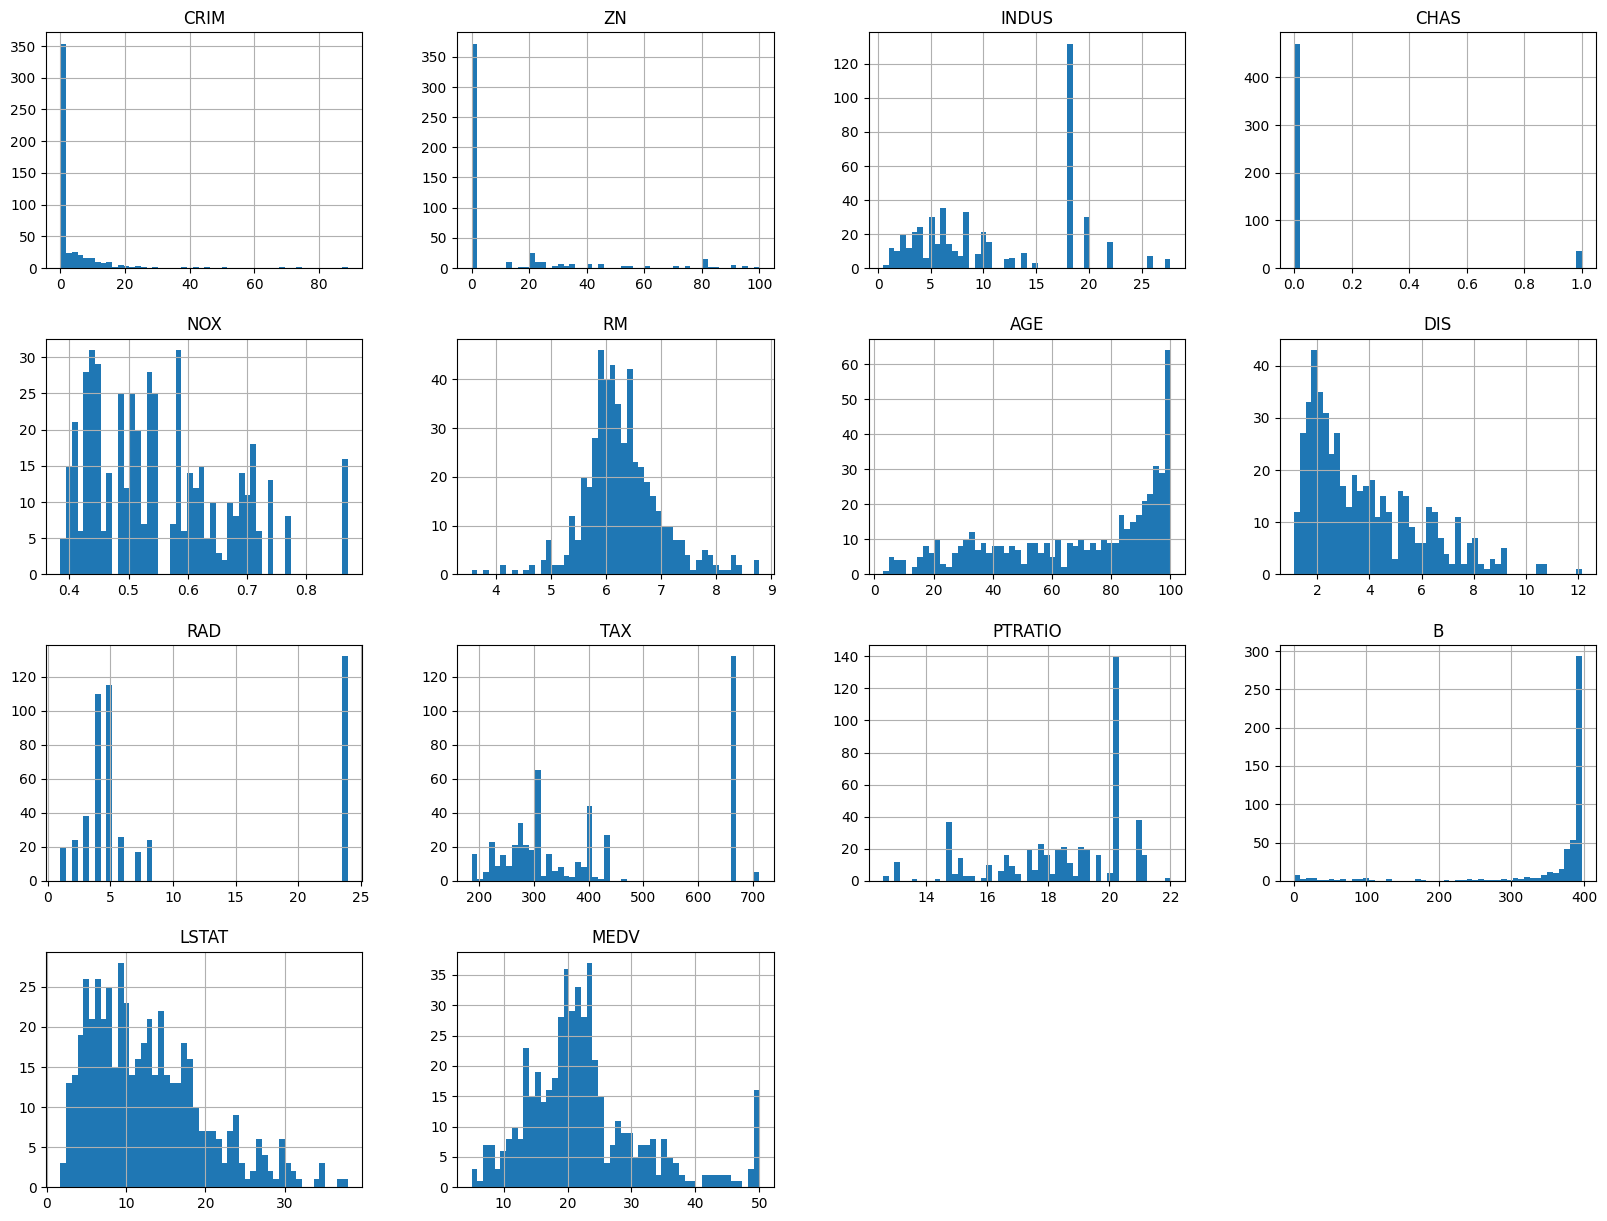

In [168]:
housing.hist(bins=50 , figsize=(20,15))
plt.show()

Looking for Correlations

In [169]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.696169
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='ZN', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

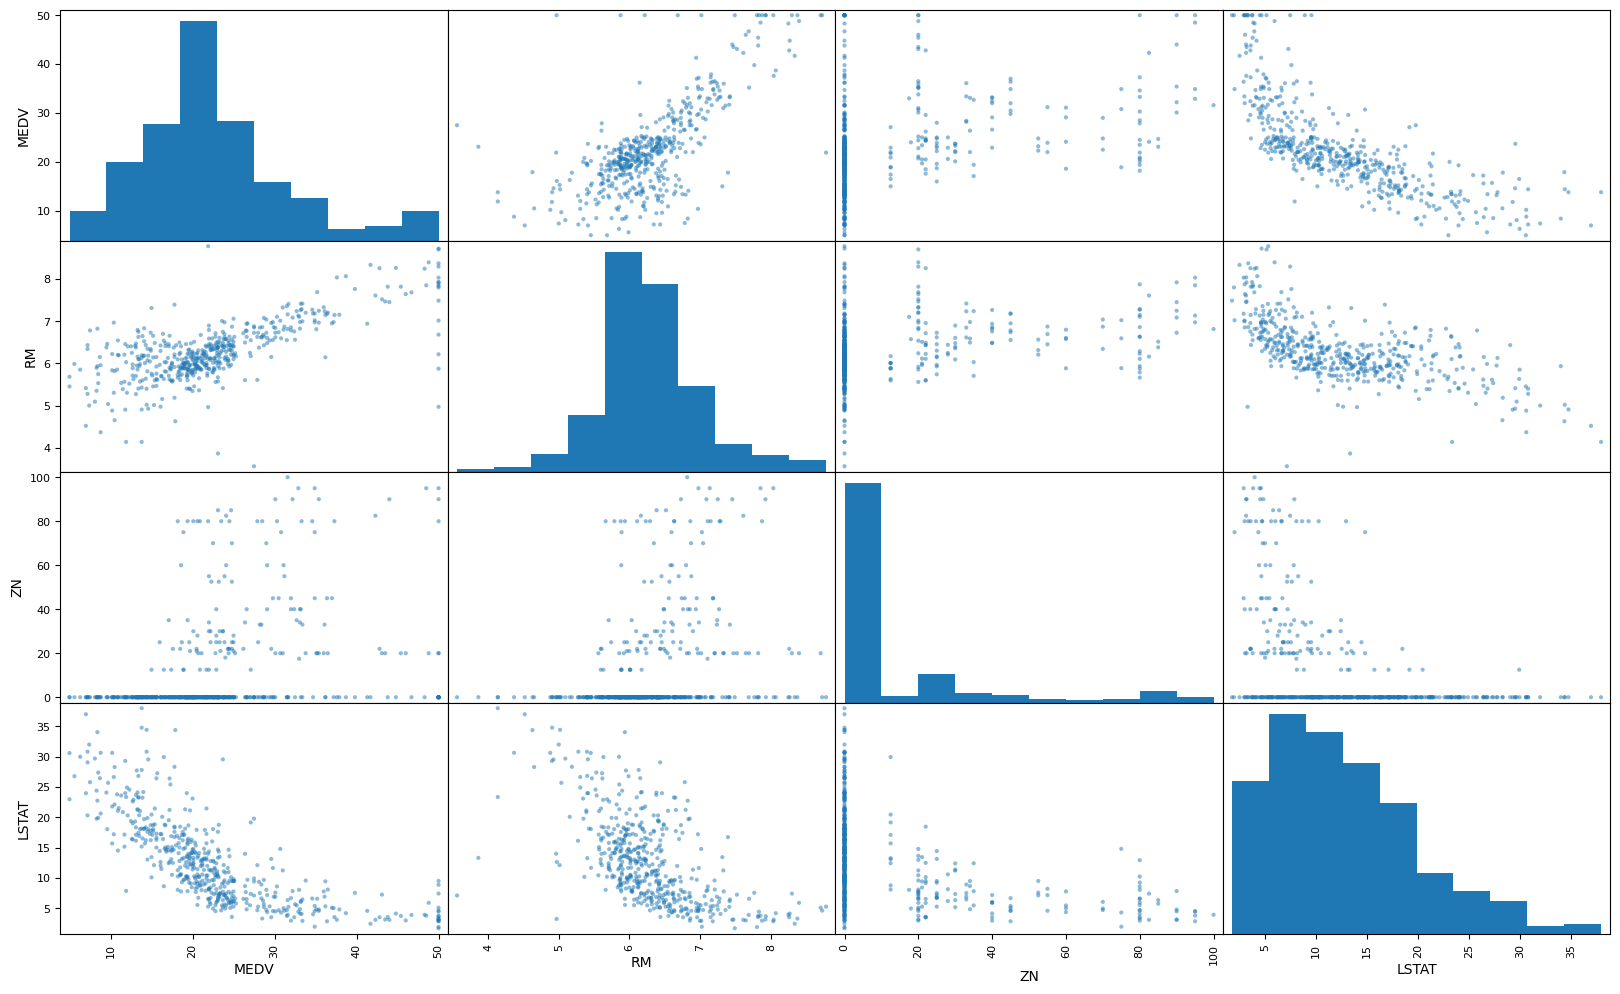

In [170]:
from pandas.plotting import scatter_matrix

attributes = ["MEDV" , "RM" , "ZN" , "LSTAT"]
scatter_matrix(housing[attributes] , figsize=(20,12))

Feature Scaling and Creating Pipeline

In [171]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

my_pipeline = Pipeline([
    ('imputer' , SimpleImputer(strategy='median')),
    ('std_scaler' , StandardScaler())
])

housing_num_tr = my_pipeline.fit_transform(housing)

housing_df = pd.DataFrame(housing_num_tr , columns=housing.columns)

Train-Test Splitting

In [172]:
from sklearn.model_selection import train_test_split

inputs = housing_df.drop(["MEDV"] , axis='columns')
outputs = housing_df.MEDV

X_train , X_test , y_train , y_test = train_test_split(inputs , outputs , test_size=0.2 , random_state=42)
# len(X_train) , len(X_test) , len(y_train) , len(y_test)
X_train['CHAS'].value_counts() , X_test['CHAS'].value_counts()

(CHAS
 -0.272599    375
  3.668398     29
 Name: count, dtype: int64,
 CHAS
 -0.272599    96
  3.668398     6
 Name: count, dtype: int64)

Selecting a Desired model for Training the Dataset

In [173]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# model = LinearRegression()
# model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(X_train , y_train)

RandomForestRegressor()

Evaluating Model

In [174]:
from sklearn.metrics import mean_squared_error

y_predicted = model.predict(X_train)
lin_mse = mean_squared_error(y_train , y_predicted)
lin_mse

0.02158844342310696

Evaluation by Cross Validation

In [175]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model , X_train , y_train , scoring='neg_mean_squared_error' , cv=10)
rmse_scores = np.sqrt(-scores)
rmse_scores

array([0.33295792, 0.36731146, 0.30728536, 0.60926806, 0.54820862,
       0.3173129 , 0.42474626, 0.27291778, 0.2647152 , 0.49858579])

In [176]:
def print_scores(scores):
    print("Scores:" , scores)
    print("Mean:" , scores.mean())
    print("Std_Deviation:" , scores.std())

In [177]:
print_scores(rmse_scores)

Scores: [0.33295792 0.36731146 0.30728536 0.60926806 0.54820862 0.3173129
 0.42474626 0.27291778 0.2647152  0.49858579]
Mean: 0.3943309354886043
Std_Deviation: 0.11455010916679108


In [178]:
from joblib import dump , load
dump(model , 'Real_Estate.joblib')

['Real_Estate.joblib']

In [179]:
nm = load("Real_Estate.joblib")
nm.score(X_test , y_test)

0.881153505074442